# Qualifications analysis for data jobs - Differentiated according to profession
#### TeamBanov
#### Henriett Kapui, Aleksandar Banov, Matthias Humer



Problem Overview:
In this notebook we are guided by our work in _USA_jobs_analysis.ipynb_. But now we differentiate between the three professions "data scientist", "data analyst" and "data engineer", and research what the requirements are for each group.

**This notebook**: In this notebook we are going to conduct an analysis on the data from kaggle: https://www.kaggle.com/code/inigoml/data-exploration/data?select=indeed_job_dataset.csv

In [73]:
# imports
import pandas as pd
import numpy as np

# imports for plots
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle,Circle
from matplotlib.lines import Line2D

# imports to do the wordcloud and for all the regular expressions
from wordcloud import WordCloud
import regex as re

In [74]:
try:
    df = pd.read_csv('DA_DE_DS.csv')
# if the error occurs, handle it !!
except ImportError:
    print("An error occured while importing the file!!!")
    # if no error occurs
else:
    print("No Error occured!!")

In [75]:
# uses re library for regular expressions
def row_clean(row):
    row = str(row)                        # to string
    row = row.replace("-", " ")           # get's rid of hyphens 
    row = re.sub("[\n]", " ", row)        # get's rid of new lines
    row = re.sub("[.!?\()-,:]", "", row)  # get's rid of nonempty sequence of characters from the set of given characters (some are escaped)
    row = row.lower()                     # lowercases the data
    return row

#apply the function above ot the job_description data to make a new column
df["clean_description"] = df["job_description"].apply(row_clean)

df["clean_description"]

0        position summary    the business analyst role...
1        what do we need    you to have an amazing per...
2        validate analyze and conduct statistical anal...
3        full time washington dc metro area starting s...
4        assist in consultations with business partner...
                              ...                        
4797     as a data software engineer you will focus on...
4798     want to change the world how about contribute...
4799     identify and solve hybrid cloud data engineer...
4800     at capital one we’re building a leading infor...
4801     develops parallel data intensive systems usin...
Name: clean_description, Length: 4802, dtype: object

In [76]:
grouped = df.groupby(df.job_title)
df_ds = grouped.get_group("data_scientist")
df_da = grouped.get_group("data_analyst")
df_de = grouped.get_group("data_engineer")

In [77]:
df_ds.head()

,job_title,job_description,clean_description
0,data_scientist,"POSITION SUMMARY, The Business Analyst rol...",position summary the business analyst role...
1,data_scientist,"What do we need?, You to have an amazing p...",what do we need you to have an amazing per...
2,data_scientist,"Validate, analyze, and conduct statistical an...",validate analyze and conduct statistical anal...
3,data_scientist,"Full time, Washington, DC metro area, Startin...",full time washington dc metro area starting s...
4,data_scientist,Assist in consultations with business partner...,assist in consultations with business partner...


In [78]:

import nltk
from gensim.models import Word2Vec
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer

# required download
nltk.download('punkt')

bachelor_list = ['bs','b.s','bsc','bs/ms','bachelor','ba/bs','b.s.','bs/ms/phd','bachelors','ba','bs/ba','undergraduate']
master_list = ['masters','master','bs/ms','m.s.','m.s','msc','bs/ms/phd','ms','md/phd','ms/phd','postgraduate']
phd_list = ['phd','ph.d.','ph.d','bs/ms/phd','md/phd','ms/phd','doctoral','postgraduate','doctorate']


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Level of education

#### Data Scientist

<ipython-input-79-54b96b308045>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ds["sent_word_sets"] = sent_word_sets
<ipython-input-79-54b96b308045>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ds["bachelors"] = df_ds["sent_word_sets"].apply(lambda x: has_qual(x,bachelor_list))
<ipython-input-79-54b96b308045>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

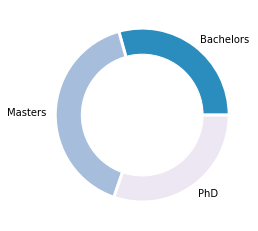

In [79]:
# 2 containters
sentences = []
sent_word_sets = []
for row in df_ds.iterrows():                   # itterate through the rows
    desc = row[1].clean_description         # get second element of tuple which is the whole row and select the value of the clean_description column
    word_tokens = nltk.word_tokenize(desc)  # Return a tokenized copy the text
    sentences.append(word_tokens)           # saves the tokens into sentenses
    sent_word_sets.append(set(word_tokens)) # make a set of the tokens (no duplicates)
# initialize the model 
model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count= 1, workers=4)
# container
possible_words = set()

# Finds the top-N most similar words. 
# Positive words contribute positively towards the similarity, negative words negatively.
similar_words = model.wv.most_similar('bachelor', topn=30)

# itterate over similar words and add them if they are not already present in the set
for tup in similar_words:
    possible_words.add(tup[0]) 
# Finds the top-N most similar words. 
# Positive words contribute positively towards the similarity, negative words negatively.
similar_words = model.wv.most_similar('masters', topn=30)

# itterate over similar words and add them if they are not already present in the set
for tup in similar_words:
    possible_words.add(tup[0])
# Finds the top-N most similar words. 
# Positive words contribute positively towards the similarity, negative words negatively.
similar_words = model.wv.most_similar('phd', topn=30)

# itterate over similar words and add them if they are not already present in the set
for tup in similar_words:
    possible_words.add(tup[0])

# make a column out of the set of the tokens
df_ds["sent_word_sets"] = sent_word_sets
def has_qual(word_set,qual_list):
    for word in qual_list:   # for each possible word that describes the academic title
        if word in word_set: # check if it matches words from the description
            return True
    return False
# apply to the new column to creat 3 new binary columns that describe the academic title of the job
df_ds["bachelors"] = df_ds["sent_word_sets"].apply(lambda x: has_qual(x,bachelor_list))
df_ds["masters"] = df_ds["sent_word_sets"].apply(lambda x: has_qual(x,master_list))
df_ds["phd"] = df_ds["sent_word_sets"].apply(lambda x: has_qual(x,phd_list))
 
# create data
names = ['Bachelors', 'Masters', 'PhD']
size = [df_ds['bachelors'].sum(),df_ds['masters'].sum(),df_ds['phd'].sum()]
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names, colors=['#2b8cbe','#a6bddb','#ece7f2'], wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()

#### Data Analyst

<ipython-input-80-348844723d37>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_da["sent_word_sets"] = sent_word_sets
<ipython-input-80-348844723d37>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_da["bachelors"] = df_da["sent_word_sets"].apply(lambda x: has_qual(x,bachelor_list))
<ipython-input-80-348844723d37>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

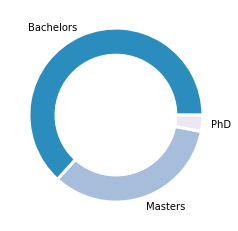

In [80]:
# 2 containters
sentences = []
sent_word_sets = []
for row in df_da.iterrows():                   # itterate through the rows
    desc = row[1].clean_description         # get second element of tuple which is the whole row and select the value of the clean_description column
    word_tokens = nltk.word_tokenize(desc)  # Return a tokenized copy the text
    sentences.append(word_tokens)           # saves the tokens into sentenses
    sent_word_sets.append(set(word_tokens)) # make a set of the tokens (no duplicates)
# initialize the model 
model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count= 1, workers=4)
# container
possible_words = set()

# Finds the top-N most similar words. 
# Positive words contribute positively towards the similarity, negative words negatively.
similar_words = model.wv.most_similar('bachelor', topn=30)

# itterate over similar words and add them if they are not already present in the set
for tup in similar_words:
    possible_words.add(tup[0]) 
# Finds the top-N most similar words. 
# Positive words contribute positively towards the similarity, negative words negatively.
similar_words = model.wv.most_similar('masters', topn=30)

# itterate over similar words and add them if they are not already present in the set
for tup in similar_words:
    possible_words.add(tup[0])
# Finds the top-N most similar words. 
# Positive words contribute positively towards the similarity, negative words negatively.
similar_words = model.wv.most_similar('phd', topn=30)

# itterate over similar words and add them if they are not already present in the set
for tup in similar_words:
    possible_words.add(tup[0])

# make a column out of the set of the tokens
df_da["sent_word_sets"] = sent_word_sets
def has_qual(word_set,qual_list):
    for word in qual_list:   # for each possible word that describes the academic title
        if word in word_set: # check if it matches words from the description
            return True
    return False
# apply to the new column to creat 3 new binary columns that describe the academic title of the job
df_da["bachelors"] = df_da["sent_word_sets"].apply(lambda x: has_qual(x,bachelor_list))
df_da["masters"] = df_da["sent_word_sets"].apply(lambda x: has_qual(x,master_list))
df_da["phd"] = df_da["sent_word_sets"].apply(lambda x: has_qual(x,phd_list))
 
# create data
names = ['Bachelors', 'Masters', 'PhD']
size = [df_da['bachelors'].sum(),df_da['masters'].sum(),df_da['phd'].sum()]
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names, colors=['#2b8cbe','#a6bddb','#ece7f2'], wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()

#### Data Engineer

<ipython-input-81-7d9bdcb4855f>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de["sent_word_sets"] = sent_word_sets
<ipython-input-81-7d9bdcb4855f>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de["bachelors"] = df_de["sent_word_sets"].apply(lambda x: has_qual(x,bachelor_list))
<ipython-input-81-7d9bdcb4855f>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

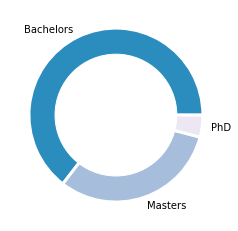

In [81]:
# 2 containters
sentences = []
sent_word_sets = []
for row in df_de.iterrows():                   # itterate through the rows
    desc = row[1].clean_description         # get second element of tuple which is the whole row and select the value of the clean_description column
    word_tokens = nltk.word_tokenize(desc)  # Return a tokenized copy the text
    sentences.append(word_tokens)           # saves the tokens into sentenses
    sent_word_sets.append(set(word_tokens)) # make a set of the tokens (no duplicates)
# initialize the model 
model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count= 1, workers=4)
# container
possible_words = set()

# Finds the top-N most similar words. 
# Positive words contribute positively towards the similarity, negative words negatively.
similar_words = model.wv.most_similar('bachelor', topn=30)

# itterate over similar words and add them if they are not already present in the set
for tup in similar_words:
    possible_words.add(tup[0]) 
# Finds the top-N most similar words. 
# Positive words contribute positively towards the similarity, negative words negatively.
similar_words = model.wv.most_similar('masters', topn=30)

# itterate over similar words and add them if they are not already present in the set
for tup in similar_words:
    possible_words.add(tup[0])
# Finds the top-N most similar words. 
# Positive words contribute positively towards the similarity, negative words negatively.
similar_words = model.wv.most_similar('phd', topn=30)

# itterate over similar words and add them if they are not already present in the set
for tup in similar_words:
    possible_words.add(tup[0])

# make a column out of the set of the tokens
df_de["sent_word_sets"] = sent_word_sets
def has_qual(word_set,qual_list):
    for word in qual_list:   # for each possible word that describes the academic title
        if word in word_set: # check if it matches words from the description
            return True
    return False
# apply to the new column to creat 3 new binary columns that describe the academic title of the job
df_de["bachelors"] = df_de["sent_word_sets"].apply(lambda x: has_qual(x,bachelor_list))
df_de["masters"] = df_de["sent_word_sets"].apply(lambda x: has_qual(x,master_list))
df_de["phd"] = df_de["sent_word_sets"].apply(lambda x: has_qual(x,phd_list))
 
# create data
names = ['Bachelors', 'Masters', 'PhD']
size = [df_de['bachelors'].sum(),df_de['masters'].sum(),df_de['phd'].sum()]
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names, colors=['#2b8cbe','#a6bddb','#ece7f2'], wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()

### Skill Analysis

#### Data Scientist

In [82]:
# convert the column to an array of stirngs
text = df_ds.clean_description.values

# Create a regex search function
def count_text(patt,text):
    pattern = re.compile(patt) # regex pattern to regex object used for matching
    count = 0                  # counter
    for t in text:             # itterate over the strings of all columns
        if pattern.search(t):  # if we find a match for the regex pattern
            count+=1           # we add to the counter
    return count

Programming skills

<ipython-input-83-a34f08c29a0a>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])


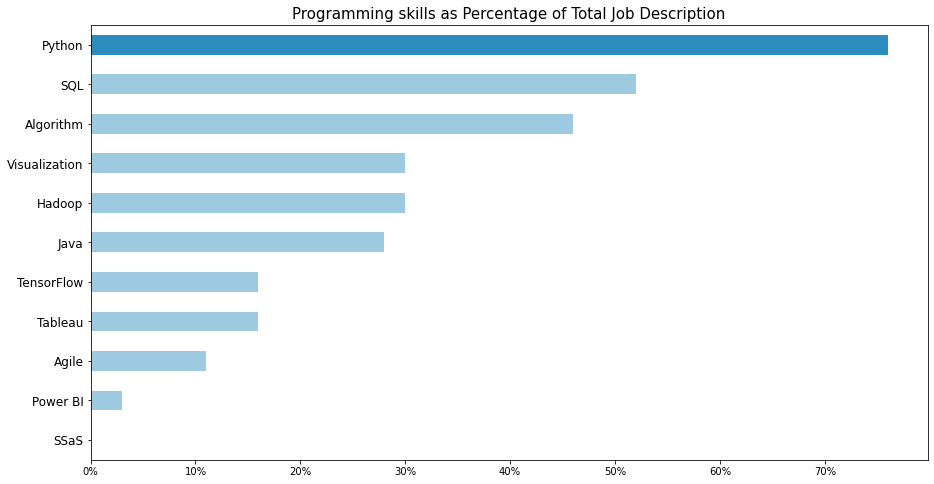

In [83]:
# Create a data frame with skills name and regex pattern to search with
skills = ['Python','Hadoop','SQL','Tableau','TensorFlow','Agile','Power BI','SSaS','Algorithm','Java','Visualization']

skill_patt = ['(?i)\WPython\W','(?i)\WHadoop\W?','(?i)SQL\w*','(?i)\WTableau\W?',
              "(?i)\WTensorFlow\W?","(?i)\WAgile\W?","(?i)\WPower\s?BI\W?",
             "(?i)\WSSAS\W?","(?i)\WAlgorithms?\W?",'(?i)Java\w*','(?i)\WVisualization\W?']

skill_df_ds =pd.DataFrame(
    {"skill": skills,
     "regex_pattern":skill_patt})

#container
container = []

# Iterate through the list of skill using the search function created
for x in skill_df_ds['regex_pattern']:
    # append the number of counts to the container
    container.append(count_text(x,text))
    
# assign the container to a column    
skill_df_ds['count'] = container

#calculate the percentage
skill_df_ds['percentage'] = round(skill_df_ds['count']/len(text),2)
skill_df_ds

x = skill_df_ds.sort_values(by = 'percentage')

ax =x['percentage'].plot(kind = "barh",figsize = (15,8),\
                         color=['#9ecae1','#9ecae1','#9ecae1','#9ecae1',\
                                '#9ecae1','#9ecae1','#9ecae1','#9ecae1','#9ecae1','#9ecae1', '#2b8cbe'])

ax.set_title('Programming skills as Percentage of Total Job Description', size = 15)
ax.set_yticklabels(x['skill'], size = 12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])

plt.show()

Cloud Service Providers

<ipython-input-84-9d7c28e9c661>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])


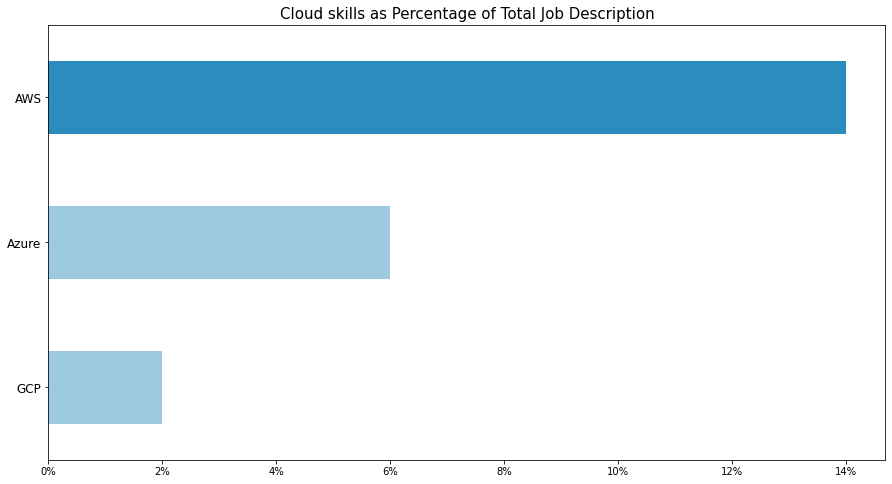

In [84]:
# Create a data frame with skills name and regex pattern to search with
skills = ['AWS','Azure','GCP']

skill_patt = ['(?i)AWS\w*','(?i)\WAzure\W?','(?i)GCP\w*']

skill_df_ds =pd.DataFrame(
    {"skill": skills,
     "regex_pattern":skill_patt})

# container
container = []

# Iterate through the list of skill using the search function created
for x in skill_df_ds['regex_pattern']:
    container.append(count_text(x,text))

# assign the container to a column
skill_df_ds['count'] = container

# calculate the percentage
skill_df_ds['percentage'] = round(skill_df_ds['count']/len(text),2)

x = skill_df_ds.sort_values(by = 'percentage')

ax =x['percentage'].plot(kind = "barh",figsize = (15,8), color=['#9ecae1','#9ecae1','#2b8cbe'])

ax.set_title('Cloud skills as Percentage of Total Job Description', size = 15)
ax.set_yticklabels(x['skill'], size = 12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])
plt.show()


Technologies

<ipython-input-85-539b8a974eda>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])


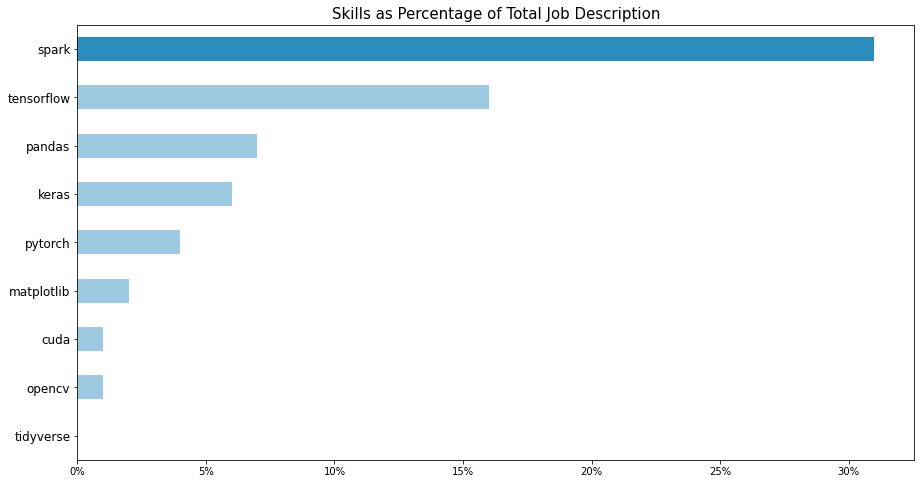

In [85]:
# Create a data frame with skills name and regex pattern to search with
skills = ['tensorflow','pytorch','spark','keras','opencv','cuda','pandas','matplotlib','tidyverse']

skill_patt = ["(?i)\WTensorFlow\W?","(?i)\WPyTorch\W?","(?i)\WSpark\W?","(?i)\Wkeras\W?","(?i)\Wopencv\W?","(?i)\WCuda\W?",'(?i)\WPandas\W?','(?i)\Wmatplotlib\W?','(?i)Wtidyverse\W?']

skill_df_ds =pd.DataFrame(
    {"skill": skills,
     "regex_pattern":skill_patt})

# container
container = []

# Iterate through the list of skill using the search function created
for x in skill_df_ds['regex_pattern']:
    container.append(count_text(x,text))
    
# assign the container to a column
skill_df_ds['count'] = container

# calculate the percentage
skill_df_ds['percentage'] = round(skill_df_ds['count']/len(text),2)

x = skill_df_ds.sort_values(by = 'percentage')

ax =x['percentage'].plot(kind = "barh",figsize = (15,8),\
                         color=['#9ecae1','#9ecae1','#9ecae1','#9ecae1',\
                                '#9ecae1','#9ecae1','#9ecae1','#9ecae1','#2b8cbe'])


ax.set_title('Skills as Percentage of Total Job Description', size = 15)
ax.set_yticklabels(x['skill'], size = 12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])

plt.show()


#### Data Analyst

In [86]:
# convert the column to an array of stirngs
text = df_da.clean_description.values

# Create a regex search function
def count_text(patt,text):
    pattern = re.compile(patt) # regex pattern to regex object used for matching
    count = 0                  # counter
    for t in text:             # itterate over the strings of all columns
        if pattern.search(t):  # if we find a match for the regex pattern
            count+=1           # we add to the counter
    return count

Programming skills

<ipython-input-87-482fd6e42e23>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])


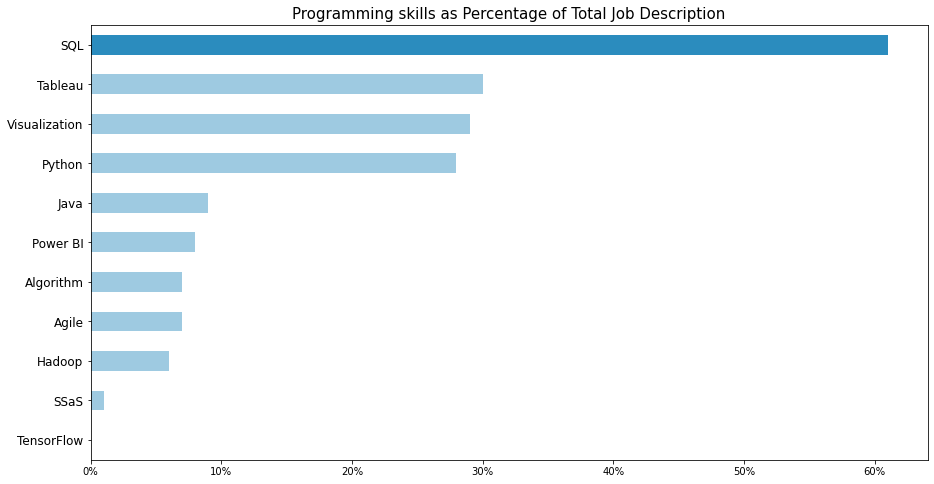

In [87]:
# Create a data frame with skills name and regex pattern to search with
skills = ['Python','Hadoop','SQL','Tableau','TensorFlow','Agile','Power BI','SSaS','Algorithm','Java','Visualization']

skill_patt = ['(?i)\WPython\W','(?i)\WHadoop\W?','(?i)SQL\w*','(?i)\WTableau\W?',
              "(?i)\WTensorFlow\W?","(?i)\WAgile\W?","(?i)\WPower\s?BI\W?",
             "(?i)\WSSAS\W?","(?i)\WAlgorithms?\W?",'(?i)Java\w*','(?i)\WVisualization\W?']

skill_df_da =pd.DataFrame(
    {"skill": skills,
     "regex_pattern":skill_patt})

#container
container = []

# Iterate through the list of skill using the search function created
for x in skill_df_da['regex_pattern']:
    # append the number of counts to the container
    container.append(count_text(x,text))
    
# assign the container to a column    
skill_df_da['count'] = container

#calculate the percentage
skill_df_da['percentage'] = round(skill_df_da['count']/len(text),2)
skill_df_da

x = skill_df_da.sort_values(by = 'percentage')

ax =x['percentage'].plot(kind = "barh",figsize = (15,8),\
                         color=['#9ecae1','#9ecae1','#9ecae1','#9ecae1',\
                                '#9ecae1','#9ecae1','#9ecae1','#9ecae1','#9ecae1','#9ecae1', '#2b8cbe'])

ax.set_title('Programming skills as Percentage of Total Job Description', size = 15)
ax.set_yticklabels(x['skill'], size = 12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])

plt.show()

Cloud Service Providers

<ipython-input-88-a1f7373410a2>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])


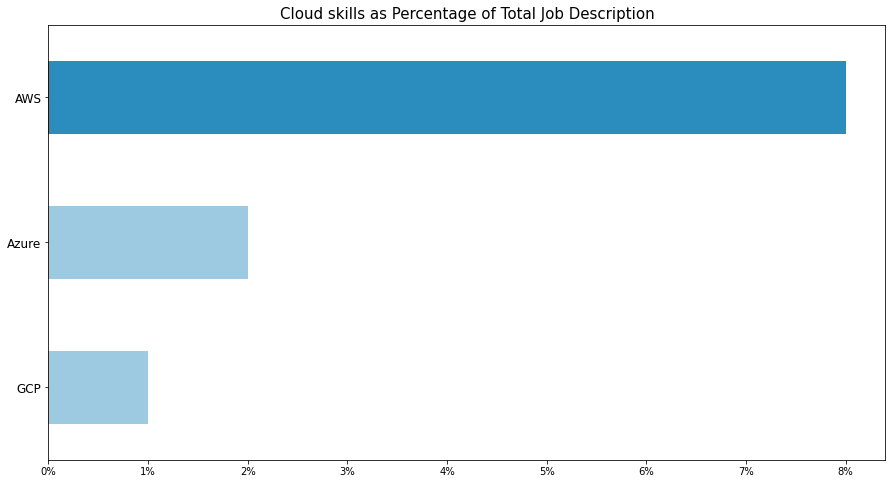

In [88]:
# Create a data frame with skills name and regex pattern to search with
skills = ['AWS','Azure','GCP']

skill_patt = ['(?i)AWS\w*','(?i)\WAzure\W?','(?i)GCP\w*']

skill_df_da =pd.DataFrame(
    {"skill": skills,
     "regex_pattern":skill_patt})

# container
container = []

# Iterate through the list of skill using the search function created
for x in skill_df_da['regex_pattern']:
    container.append(count_text(x,text))

# assign the container to a column
skill_df_da['count'] = container

# calculate the percentage
skill_df_da['percentage'] = round(skill_df_da['count']/len(text),2)

x = skill_df_da.sort_values(by = 'percentage')

ax =x['percentage'].plot(kind = "barh",figsize = (15,8), color=['#9ecae1','#9ecae1','#2b8cbe'])

ax.set_title('Cloud skills as Percentage of Total Job Description', size = 15)
ax.set_yticklabels(x['skill'], size = 12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])
plt.show()


Technologies

<ipython-input-89-3878bc909b18>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])


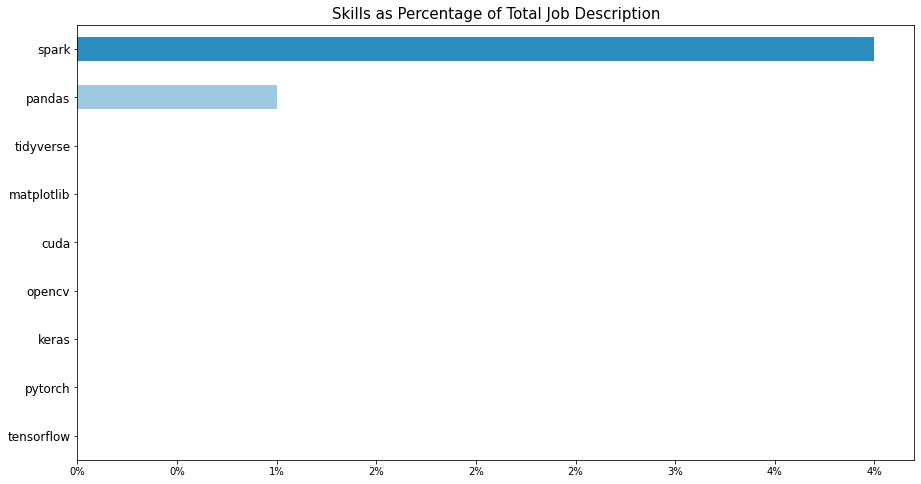

In [89]:
# Create a data frame with skills name and regex pattern to search with
skills = ['tensorflow','pytorch','spark','keras','opencv','cuda','pandas','matplotlib','tidyverse']

skill_patt = ["(?i)\WTensorFlow\W?","(?i)\WPyTorch\W?","(?i)\WSpark\W?","(?i)\Wkeras\W?","(?i)\Wopencv\W?","(?i)\WCuda\W?",'(?i)\WPandas\W?','(?i)\Wmatplotlib\W?','(?i)Wtidyverse\W?']

skill_df_da =pd.DataFrame(
    {"skill": skills,
     "regex_pattern":skill_patt})

# container
container = []

# Iterate through the list of skill using the search function created
for x in skill_df_da['regex_pattern']:
    container.append(count_text(x,text))
    
# assign the container to a column
skill_df_da['count'] = container

# calculate the percentage
skill_df_da['percentage'] = round(skill_df_da['count']/len(text),2)

x = skill_df_da.sort_values(by = 'percentage')

ax =x['percentage'].plot(kind = "barh",figsize = (15,8),\
                         color=['#9ecae1','#9ecae1','#9ecae1','#9ecae1',\
                                '#9ecae1','#9ecae1','#9ecae1','#9ecae1','#2b8cbe'])


ax.set_title('Skills as Percentage of Total Job Description', size = 15)
ax.set_yticklabels(x['skill'], size = 12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])

plt.show()


#### Data Engineer

In [90]:
# convert the column to an array of stirngs
text = df_de.clean_description.values

# Create a regex search function
def count_text(patt,text):
    pattern = re.compile(patt) # regex pattern to regex object used for matching
    count = 0                  # counter
    for t in text:             # itterate over the strings of all columns
        if pattern.search(t):  # if we find a match for the regex pattern
            count+=1           # we add to the counter
    return count

Programming skills

<ipython-input-91-4ec7fc95a97e>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])


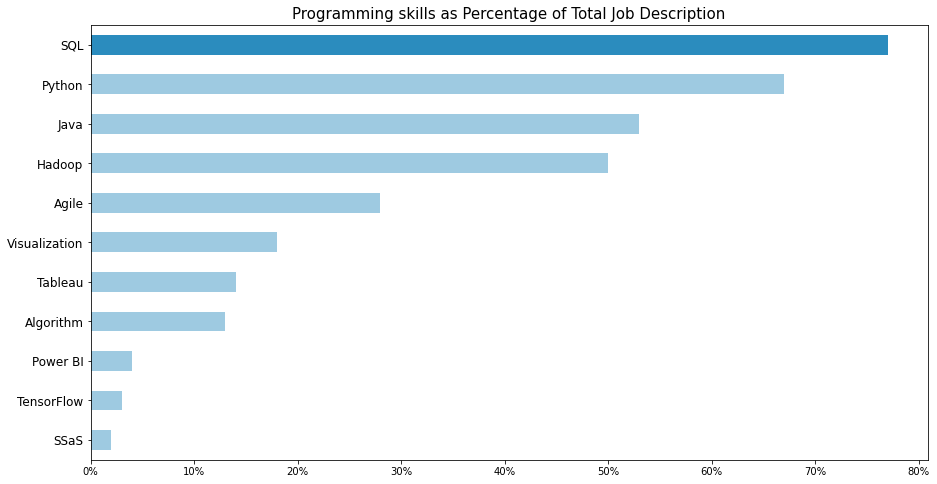

In [91]:
# Create a data frame with skills name and regex pattern to search with
skills = ['Python','Hadoop','SQL','Tableau','TensorFlow','Agile','Power BI','SSaS','Algorithm','Java','Visualization']

skill_patt = ['(?i)\WPython\W','(?i)\WHadoop\W?','(?i)SQL\w*','(?i)\WTableau\W?',
              "(?i)\WTensorFlow\W?","(?i)\WAgile\W?","(?i)\WPower\s?BI\W?",
             "(?i)\WSSAS\W?","(?i)\WAlgorithms?\W?",'(?i)Java\w*','(?i)\WVisualization\W?']

skill_df_de =pd.DataFrame(
    {"skill": skills,
     "regex_pattern":skill_patt})

#container
container = []

# Iterate through the list of skill using the search function created
for x in skill_df_de['regex_pattern']:
    # append the number of counts to the container
    container.append(count_text(x,text))
    
# assign the container to a column    
skill_df_de['count'] = container

#calculate the percentage
skill_df_de['percentage'] = round(skill_df_de['count']/len(text),2)
skill_df_de

x = skill_df_de.sort_values(by = 'percentage')

ax =x['percentage'].plot(kind = "barh",figsize = (15,8),\
                         color=['#9ecae1','#9ecae1','#9ecae1','#9ecae1',\
                                '#9ecae1','#9ecae1','#9ecae1','#9ecae1','#9ecae1','#9ecae1', '#2b8cbe'])

ax.set_title('Programming skills as Percentage of Total Job Description', size = 15)
ax.set_yticklabels(x['skill'], size = 12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])

plt.show()

Cloud Service Providers

<ipython-input-92-fe3c228f92bc>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])


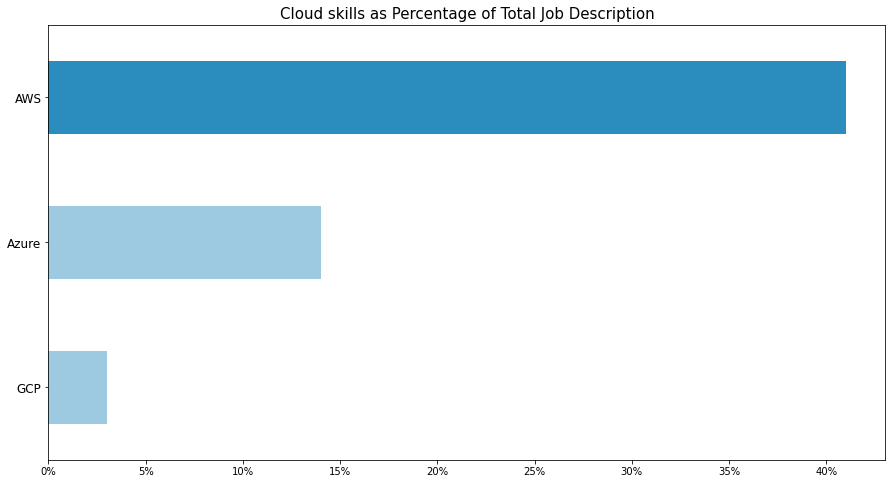

In [92]:
# Create a data frame with skills name and regex pattern to search with
skills = ['AWS','Azure','GCP']

skill_patt = ['(?i)AWS\w*','(?i)\WAzure\W?','(?i)GCP\w*']

skill_df_de =pd.DataFrame(
    {"skill": skills,
     "regex_pattern":skill_patt})

# container
container = []

# Iterate through the list of skill using the search function created
for x in skill_df_de['regex_pattern']:
    container.append(count_text(x,text))

# assign the container to a column
skill_df_de['count'] = container

# calculate the percentage
skill_df_de['percentage'] = round(skill_df_de['count']/len(text),2)

x = skill_df_de.sort_values(by = 'percentage')

ax =x['percentage'].plot(kind = "barh",figsize = (15,8), color=['#9ecae1','#9ecae1','#2b8cbe'])

ax.set_title('Cloud skills as Percentage of Total Job Description', size = 15)
ax.set_yticklabels(x['skill'], size = 12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])
plt.show()


Technologies

<ipython-input-93-493a2215ebf3>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])


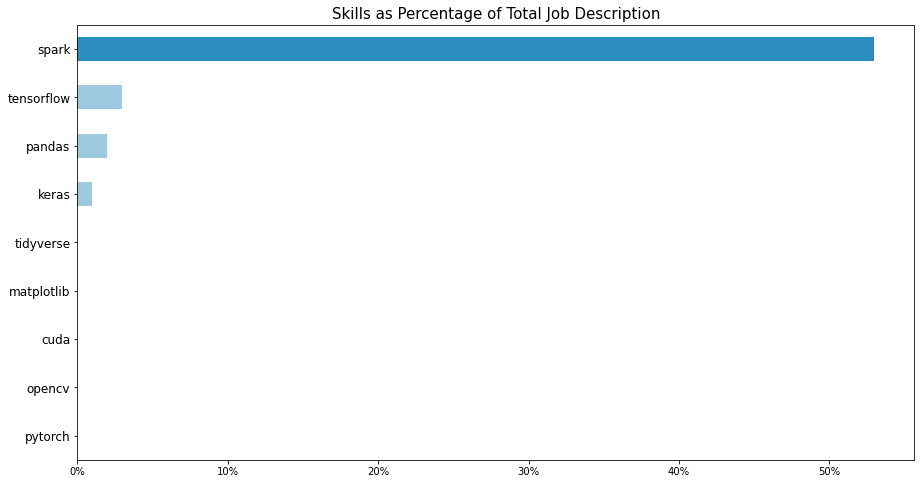

In [93]:
# Create a data frame with skills name and regex pattern to search with
skills = ['tensorflow','pytorch','spark','keras','opencv','cuda','pandas','matplotlib','tidyverse']

skill_patt = ["(?i)\WTensorFlow\W?","(?i)\WPyTorch\W?","(?i)\WSpark\W?","(?i)\Wkeras\W?","(?i)\Wopencv\W?","(?i)\WCuda\W?",'(?i)\WPandas\W?','(?i)\Wmatplotlib\W?','(?i)Wtidyverse\W?']

skill_df_de =pd.DataFrame(
    {"skill": skills,
     "regex_pattern":skill_patt})

# container
container = []

# Iterate through the list of skill using the search function created
for x in skill_df_de['regex_pattern']:
    container.append(count_text(x,text))
    
# assign the container to a column
skill_df_de['count'] = container

# calculate the percentage
skill_df_de['percentage'] = round(skill_df_de['count']/len(text),2)

x = skill_df_de.sort_values(by = 'percentage')

ax =x['percentage'].plot(kind = "barh",figsize = (15,8),\
                         color=['#9ecae1','#9ecae1','#9ecae1','#9ecae1',\
                                '#9ecae1','#9ecae1','#9ecae1','#9ecae1','#2b8cbe'])


ax.set_title('Skills as Percentage of Total Job Description', size = 15)
ax.set_yticklabels(x['skill'], size = 12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])

plt.show()
